# 图像读取与显示
OpenCV作为计算机图像处理技术，自然离不开图像图读取与显示。在OpenCV中，使用 `imread` 读取图像，`imshow`显示图像。

## `imread(filename[, flags]) -> retval` 读取图像
OpenCV读取图像，只需在`imread`函数传入图像路径即可，opencv支持市面上几乎所有图像格式，`imread`默认读取RGB模式，可以通过第2个参数设置读取的模式，比如灰度图或ARGB图，关于`imread`两个参数说明如下：

- `filename` ：图像的文件名
    - Windows bitmaps - \*.bmp, \*.dib
    - JPEG files - \*.jpeg, \*.jpg, \*.jpe
    - JPEG 2000 files - \*.jp2
    - Portable Network Graphics - \*.png
    - WebP - \*.webp
    - Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm
    - PFM files - \*.pfm
    - Sun rasters - \*.sr, \*.ras
    - TIFF files - \*.tiff, \*.tif
    - OpenEXR Image files - \*.exr
    - Radiance HDR - \*.hdr, \*.pic
    - Raster and Vector geospatial data supported by GDAL
- `flag` ：指定加载图像的模式
    - `cv.IMREAD_COLOR`(>0)：默认模式，加载一张彩色图像（RGB图像），图像的透明会被忽略
    - `cv.IMREAD_GRAYSCALE`(0)：以灰阶模式加载
    - `cv.IMREAD_UNCHANGED`(<0)：包含alpha通道

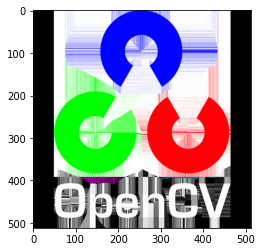

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

src_default = cv.imread('images/opencv-logo.png')
plt.imshow(src_default)

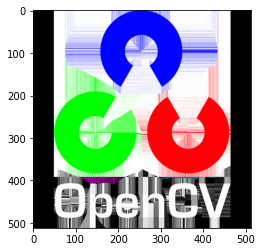

In [3]:
src_color = cv.imread('images/opencv-logo.png', cv.IMREAD_COLOR)
plt.imshow(src_color)

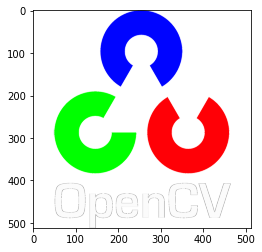

In [4]:
src_unchanged = cv.imread('images/opencv-logo.png', cv.IMREAD_UNCHANGED)
plt.imshow(src_unchanged)

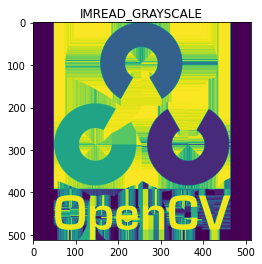

In [5]:
src_grayscale = cv.imread('images/opencv-logo.png', cv.IMREAD_GRAYSCALE)
plt.title('IMREAD_GRAYSCALE')
plt.imshow(src_grayscale)

> **注意**
- `imread`方法是否能够读取图像，取决于图像的内容，而非文件的后缀名。比如，将一个 `.zip` 文件的压缩文件后缀名改为 `.jpg` ，opencv无法读取，反之，将一个 `.jpg` 的图像文件后缀名改为 `.zip` 则依旧能成功读取。
- 通过opencv的`imread`方法读取的图像通道是以BGR的顺序存储的，而非RGB
- 如果`filename`错误，`imread`不会抛出错误，而是返回一个`None`
- 当采用`IMREAD_GRAYSCALE`模式时，将使用编解码器内部灰阶，如果可用，结果可能不同于`cvtColor()`的输出结果
- 在Windows或OS X平台，默认使用OpenCV图像编解码器。在MacOSX，有一个选项可以启用原生的MacOSX图像读取器，但是由于色彩管理嵌入在MacOSX中，原生的图像加载器提供的像素值会有所不同
- 如果图像包含EXIF信息，图像也会随着EXIF的方向旋转，除非设置了`IMREAD_IGNORE_ORIENTATION`
- `IMREAD_UNCHANGED`标签可以从PFM图像保留浮点值
- 像素数默认必须小于230，可以通过设置系统变量`OPENCV_IO_MAX_IMAGE_PIXELS`进行调整

## `imshow(winname, mat) -> None` 显示图像
当窗口设置了`cv.WINDOW_AUTOSIZE`图像将会以原始尺寸展示，不过还是会受屏幕分辨率限制，如果想要展示一个超出屏幕尺寸的图像，可以使用`cv.WINDOW_NORMAL`模式。

如果在`imshow`之前并未创建窗口，会自动以`cv.WINDOW_AUTOSIZE`创建窗口。

`imshow`的两个参数：
- winname：窗口名称，在`namedWindow`时设定
- mat：图像数据

In [ ]:
# 创建一个gui窗口
cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
# 在窗口显示图像
cv.imshow('image', src_default)
# 等待键盘事件， waitKey返回键盘的键码
cv.waitKey(0)
# 销毁窗口
cv.destroyAllWindows()